In [1]:
import sys
import os
from  torch.utils.data import DataLoader
import datetime
sys.path.append('/home/falcon/Desktop/T2P/src/utils')

from utils.plotting_utils import Plot
from utils.plotting_utils import plot_line
from utils.color import ColorPalette
from module.model import T2P
from utils.data import TimeSeriesDataset
from train import train

# T2P

T2P (time-to-pattern) is an interpretable neural network designed to identify informative patterns in time series data. 

This neural network requires several training parameters to be specified, including the window size, which determines the length of the patterns to be learned from a continuous time series data, if they are not already in a specific size. 

The n_patterns parameter specifies the number of patterns the user would like to identify in the data.

T2P also includes several hyperparameters that need to be specified for training: lambda_1, which should be chosen between 0.6-0.9, and lambda_2, which should be chosen between 0.2-0.5.

The location of BinConcrete distribution, referred to as "a", should be set between 0.6-0.8.

Additionally, a learning rate should be specified, ideally between 1e-4 and 1e-3. 

The device parameter specifies the model's training device, which can be set to "cuda" or "cpu". 

Finally, the number of epochs the model needs to learn the pattern should also be specified.

For more detailed information on the T2P neural network and its parameters, please refer to the associated paper

In [2]:
# parameters
window_size = 100
n_patterns = 4
lambda_1 = 0.83
lambda_2 = 0.21
a = 0.8
learning_rate = 1e-3
device = 'cpu'
epochs = 1000

# data file path
data_name='synthetic_100_noise.txt'
file_path = os.getcwd() + f'/data/{data_name}'

# directory to save the result if None the result would not be saved and only depict in the notebook
runId = datetime.datetime.now().isoformat().replace(':', '_')
dn = data_name.split('.')[0]
save_dir = f'{os.getcwd()}/experiments/{dn}/{runId}/'
if save_dir is not None and not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
t2p = T2P(timesteps=window_size, n_patterns=n_patterns, lambda_1=lambda_1, device=device)

In [4]:
dataset = TimeSeriesDataset(file_path, window_size, device)

In [5]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

In [6]:
loss, sparsity = train(
                        epochs,
                        t2p,
                        dataloader,
                        learning_rate,
                        a,
                        lambda_1,
                        lambda_2,
                        device
                     )

##########Start trining##########
Epoch: 000000 | ELBO: 2.427 | Sparsity: 0.013
Epoch: 000001 | ELBO: 2.432 | Sparsity: 0.010
Epoch: 000002 | ELBO: 2.400 | Sparsity: 0.009


/home/falcon/anaconda3/envs/torch9/lib/python3.7/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448224956/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 000003 | ELBO: 2.403 | Sparsity: 0.011
Epoch: 000004 | ELBO: 2.401 | Sparsity: 0.011
Epoch: 000005 | ELBO: 2.385 | Sparsity: 0.012
Epoch: 000006 | ELBO: 2.391 | Sparsity: 0.009
Epoch: 000007 | ELBO: 2.374 | Sparsity: 0.009
Epoch: 000008 | ELBO: 2.371 | Sparsity: 0.011
Epoch: 000009 | ELBO: 2.370 | Sparsity: 0.012
Epoch: 000010 | ELBO: 2.368 | Sparsity: 0.011
Epoch: 000011 | ELBO: 2.370 | Sparsity: 0.009
Epoch: 000012 | ELBO: 2.354 | Sparsity: 0.011
Epoch: 000013 | ELBO: 2.347 | Sparsity: 0.009
Epoch: 000014 | ELBO: 2.337 | Sparsity: 0.010
Epoch: 000015 | ELBO: 2.328 | Sparsity: 0.012
Epoch: 000016 | ELBO: 2.342 | Sparsity: 0.012
Epoch: 000017 | ELBO: 2.336 | Sparsity: 0.009
Epoch: 000018 | ELBO: 2.329 | Sparsity: 0.009
Epoch: 000019 | ELBO: 2.336 | Sparsity: 0.012
Epoch: 000020 | ELBO: 2.320 | Sparsity: 0.011
Epoch: 000021 | ELBO: 2.324 | Sparsity: 0.010
Epoch: 000022 | ELBO: 2.327 | Sparsity: 0.008
Epoch: 000023 | ELBO: 2.330 | Sparsity: 0.009
Epoch: 000024 | ELBO: 2.323 | Spar

Epoch: 000183 | ELBO: 1.909 | Sparsity: 0.693
Epoch: 000184 | ELBO: 1.892 | Sparsity: 0.700
Epoch: 000185 | ELBO: 1.899 | Sparsity: 0.694
Epoch: 000186 | ELBO: 1.898 | Sparsity: 0.700
Epoch: 000187 | ELBO: 1.925 | Sparsity: 0.681
Epoch: 000188 | ELBO: 1.894 | Sparsity: 0.701
Epoch: 000189 | ELBO: 1.907 | Sparsity: 0.694
Epoch: 000190 | ELBO: 1.928 | Sparsity: 0.697
Epoch: 000191 | ELBO: 1.940 | Sparsity: 0.675
Epoch: 000192 | ELBO: 1.885 | Sparsity: 0.707
Epoch: 000193 | ELBO: 1.907 | Sparsity: 0.682
Epoch: 000194 | ELBO: 1.894 | Sparsity: 0.692
Epoch: 000195 | ELBO: 1.930 | Sparsity: 0.666
Epoch: 000196 | ELBO: 1.900 | Sparsity: 0.689
Epoch: 000197 | ELBO: 1.907 | Sparsity: 0.706
Epoch: 000198 | ELBO: 1.912 | Sparsity: 0.699
Epoch: 000199 | ELBO: 1.915 | Sparsity: 0.692
Epoch: 000200 | ELBO: 1.900 | Sparsity: 0.683
Epoch: 000201 | ELBO: 1.947 | Sparsity: 0.659
Epoch: 000202 | ELBO: 1.891 | Sparsity: 0.704
Epoch: 000203 | ELBO: 1.905 | Sparsity: 0.693
Epoch: 000204 | ELBO: 1.897 | Spar

Epoch: 000367 | ELBO: 1.809 | Sparsity: 0.645
Epoch: 000368 | ELBO: 1.802 | Sparsity: 0.636
Epoch: 000369 | ELBO: 1.770 | Sparsity: 0.665
Epoch: 000370 | ELBO: 1.759 | Sparsity: 0.641
Epoch: 000371 | ELBO: 1.756 | Sparsity: 0.676
Epoch: 000372 | ELBO: 1.781 | Sparsity: 0.643
Epoch: 000373 | ELBO: 1.770 | Sparsity: 0.640
Epoch: 000374 | ELBO: 1.768 | Sparsity: 0.667
Epoch: 000375 | ELBO: 1.762 | Sparsity: 0.636
Epoch: 000376 | ELBO: 1.762 | Sparsity: 0.659
Epoch: 000377 | ELBO: 1.776 | Sparsity: 0.643
Epoch: 000378 | ELBO: 1.758 | Sparsity: 0.673
Epoch: 000379 | ELBO: 1.760 | Sparsity: 0.669
Epoch: 000380 | ELBO: 1.768 | Sparsity: 0.665
Epoch: 000381 | ELBO: 1.782 | Sparsity: 0.677
Epoch: 000382 | ELBO: 1.771 | Sparsity: 0.631
Epoch: 000383 | ELBO: 1.767 | Sparsity: 0.662
Epoch: 000384 | ELBO: 1.752 | Sparsity: 0.665
Epoch: 000385 | ELBO: 1.755 | Sparsity: 0.674
Epoch: 000386 | ELBO: 1.746 | Sparsity: 0.683
Epoch: 000387 | ELBO: 1.781 | Sparsity: 0.666
Epoch: 000388 | ELBO: 1.764 | Spar

Epoch: 000551 | ELBO: 1.741 | Sparsity: 0.673
Epoch: 000552 | ELBO: 1.767 | Sparsity: 0.635
Epoch: 000553 | ELBO: 1.761 | Sparsity: 0.668
Epoch: 000554 | ELBO: 1.723 | Sparsity: 0.670
Epoch: 000555 | ELBO: 1.751 | Sparsity: 0.678
Epoch: 000556 | ELBO: 1.730 | Sparsity: 0.668
Epoch: 000557 | ELBO: 1.728 | Sparsity: 0.693
Epoch: 000558 | ELBO: 1.766 | Sparsity: 0.656
Epoch: 000559 | ELBO: 1.732 | Sparsity: 0.679
Epoch: 000560 | ELBO: 1.742 | Sparsity: 0.666
Epoch: 000561 | ELBO: 1.730 | Sparsity: 0.678
Epoch: 000562 | ELBO: 1.757 | Sparsity: 0.632
Epoch: 000563 | ELBO: 1.723 | Sparsity: 0.663
Epoch: 000564 | ELBO: 1.730 | Sparsity: 0.663
Epoch: 000565 | ELBO: 1.726 | Sparsity: 0.685
Epoch: 000566 | ELBO: 1.724 | Sparsity: 0.668
Epoch: 000567 | ELBO: 1.735 | Sparsity: 0.654
Epoch: 000568 | ELBO: 1.751 | Sparsity: 0.678
Epoch: 000569 | ELBO: 1.748 | Sparsity: 0.656
Epoch: 000570 | ELBO: 1.746 | Sparsity: 0.677
Epoch: 000571 | ELBO: 1.747 | Sparsity: 0.644
Epoch: 000572 | ELBO: 1.719 | Spar

Epoch: 000734 | ELBO: 1.739 | Sparsity: 0.668
Epoch: 000735 | ELBO: 1.741 | Sparsity: 0.646
Epoch: 000736 | ELBO: 1.744 | Sparsity: 0.658
Epoch: 000737 | ELBO: 1.759 | Sparsity: 0.652
Epoch: 000738 | ELBO: 1.727 | Sparsity: 0.666
Epoch: 000739 | ELBO: 1.727 | Sparsity: 0.675
Epoch: 000740 | ELBO: 1.714 | Sparsity: 0.667
Epoch: 000741 | ELBO: 1.718 | Sparsity: 0.666
Epoch: 000742 | ELBO: 1.714 | Sparsity: 0.685
Epoch: 000743 | ELBO: 1.731 | Sparsity: 0.642
Epoch: 000744 | ELBO: 1.716 | Sparsity: 0.677
Epoch: 000745 | ELBO: 1.718 | Sparsity: 0.669
Epoch: 000746 | ELBO: 1.718 | Sparsity: 0.668
Epoch: 000747 | ELBO: 1.742 | Sparsity: 0.650
Epoch: 000748 | ELBO: 1.721 | Sparsity: 0.669
Epoch: 000749 | ELBO: 1.765 | Sparsity: 0.629
Epoch: 000750 | ELBO: 1.746 | Sparsity: 0.659
Epoch: 000751 | ELBO: 1.724 | Sparsity: 0.656
Epoch: 000752 | ELBO: 1.717 | Sparsity: 0.684
Epoch: 000753 | ELBO: 1.733 | Sparsity: 0.667
Epoch: 000754 | ELBO: 1.714 | Sparsity: 0.662
Epoch: 000755 | ELBO: 1.712 | Spar

Epoch: 000918 | ELBO: 1.719 | Sparsity: 0.652
Epoch: 000919 | ELBO: 1.714 | Sparsity: 0.681
Epoch: 000920 | ELBO: 1.717 | Sparsity: 0.669
Epoch: 000921 | ELBO: 1.715 | Sparsity: 0.663
Epoch: 000922 | ELBO: 1.728 | Sparsity: 0.650
Epoch: 000923 | ELBO: 1.719 | Sparsity: 0.646
Epoch: 000924 | ELBO: 1.720 | Sparsity: 0.647
Epoch: 000925 | ELBO: 1.726 | Sparsity: 0.632
Epoch: 000926 | ELBO: 1.739 | Sparsity: 0.645
Epoch: 000927 | ELBO: 1.723 | Sparsity: 0.673
Epoch: 000928 | ELBO: 1.726 | Sparsity: 0.664
Epoch: 000929 | ELBO: 1.721 | Sparsity: 0.659
Epoch: 000930 | ELBO: 1.758 | Sparsity: 0.642
Epoch: 000931 | ELBO: 1.720 | Sparsity: 0.678
Epoch: 000932 | ELBO: 1.731 | Sparsity: 0.651
Epoch: 000933 | ELBO: 1.721 | Sparsity: 0.667
Epoch: 000934 | ELBO: 1.720 | Sparsity: 0.680
Epoch: 000935 | ELBO: 1.715 | Sparsity: 0.666
Epoch: 000936 | ELBO: 1.720 | Sparsity: 0.660
Epoch: 000937 | ELBO: 1.719 | Sparsity: 0.662
Epoch: 000938 | ELBO: 1.722 | Sparsity: 0.657
Epoch: 000939 | ELBO: 1.725 | Spar

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_100_noise/2023-03-14T14_37_50.194956/Training Loss.png


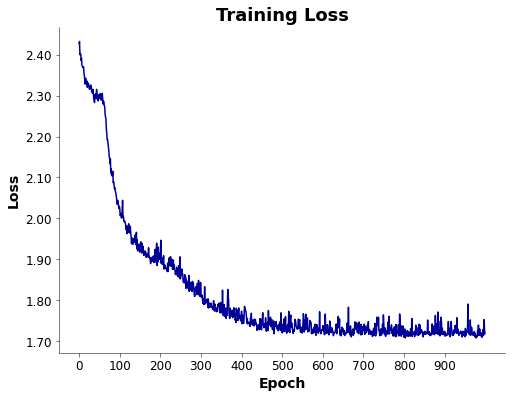

In [7]:
plot_line(loss, save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_100_noise/2023-03-14T14_37_50.194956/Sparsity of z vector.png


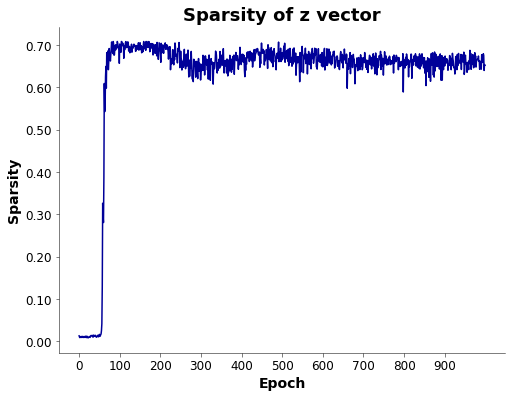

In [8]:
plot_line(sparsity, title='Sparsity of z vector', ylabel='Sparsity', save_dir=save_dir)

In [9]:
t2p.train(False)
patterns = t2p.decoder.weight[:,0].data.cpu().numpy()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
z_s = list()
alphas = list()
for i, x in enumerate(dataloader): 
    outputs = t2p(x)
    z = t2p.z.data.cpu().numpy()
    z_s.append(z[0,:,:,0,0])
    alphas.append(t2p.alpha.data.cpu().numpy()[0,:,:,0,0])

                
plot = Plot(dataset.get_input(),z_s,alphas,patterns,window_size)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_100_noise/2023-03-14T14_37_50.194956/patterns_analysis.png


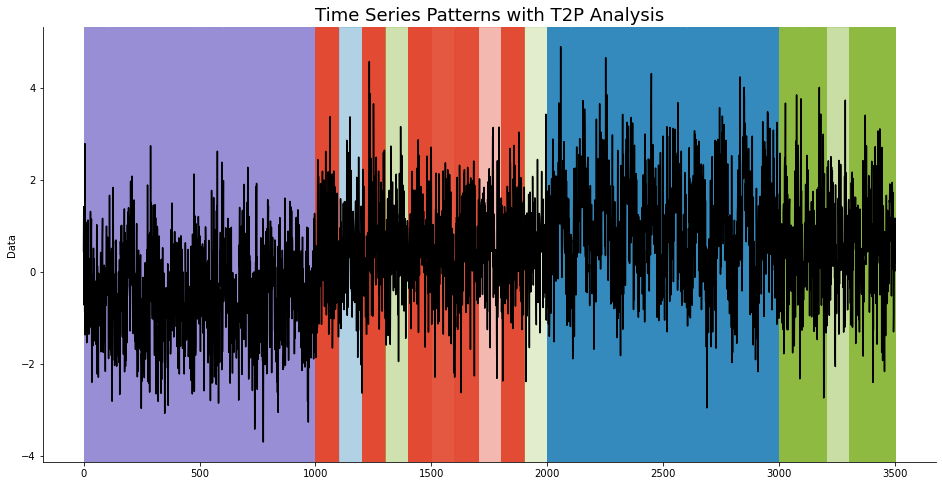

In [10]:
plot.plot_patterns_analysis(save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_100_noise/2023-03-14T14_37_50.194956/patterns.png


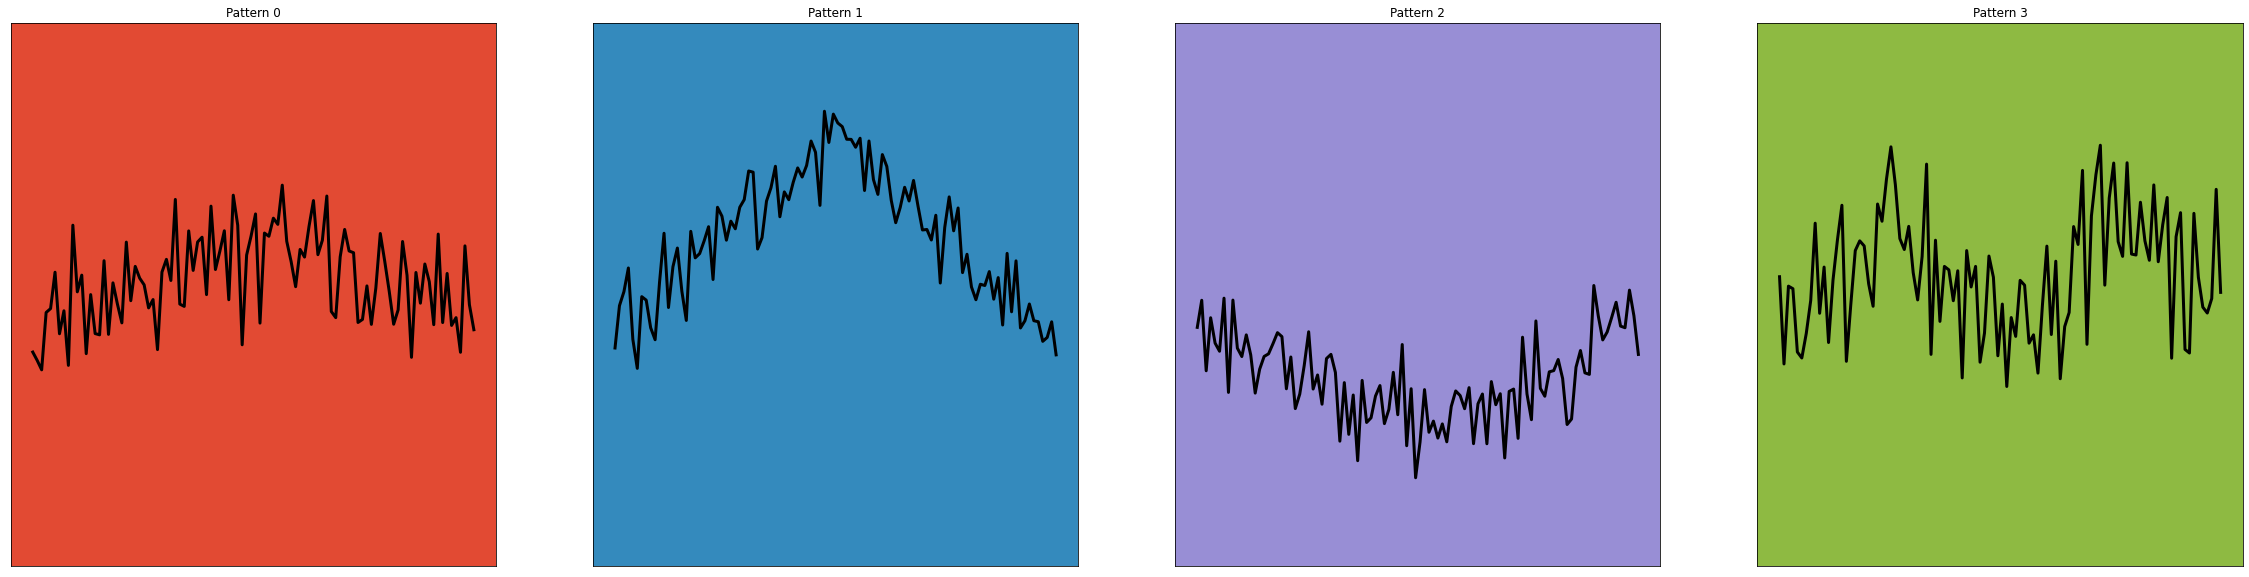

In [11]:
plot.plot_patterns(save_dir)